# Linear Regression assignment

## description

In [94]:
# importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [95]:
data=pd.read_csv('CarPrice_Assignment.csv')

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [97]:
data.head()
data=data.drop('car_ID',axis=1)
data=data.drop('CarName',axis=1)

In [98]:
#lets separate the variables into numeric and objects
dtype_float=[]
dtype_obj=[]
for i in data.columns:
    if data[i].describe().dtype==float:
        dtype_float.append(i)
    if data[i].describe().dtype==object:
        dtype_obj.append(i)

In [99]:
data[dtype_obj].describe()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205
unique,2,2,2,5,3,2,7,7,8
top,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,185,168,115,96,120,202,148,159,94


In [100]:
# lets see if any categorical data in numeric data
data[dtype_float].nunique()

symboling             6
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginesize           44
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

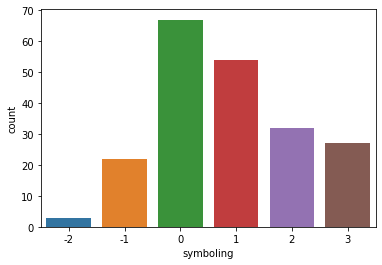

In [101]:
# car symboling shows some categorical properties
sns.countplot(data.symboling)

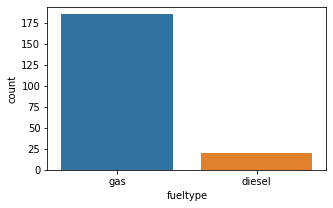

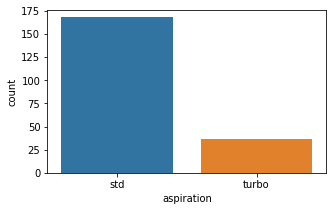

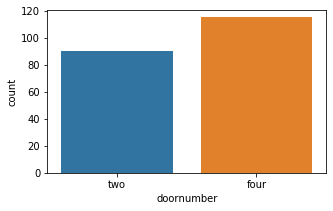

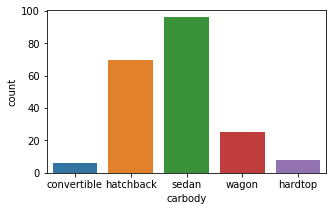

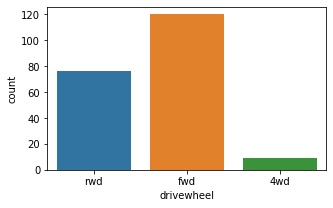

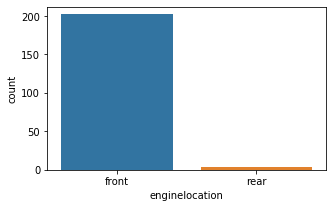

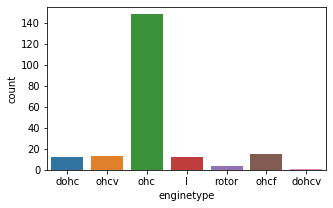

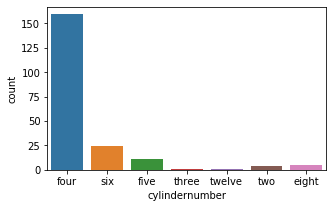

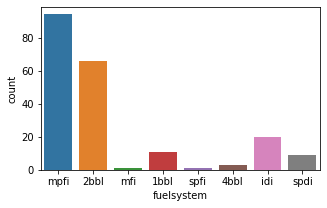

In [102]:
#lets plot all the categorical variables
for i in data[dtype_obj].columns:
    plt.figure(figsize=(5,3))
    sns.countplot(data[i])
    plt.show()

In [103]:
#lets see stats for numeric columns
y=data.price
x=data[dtype_float].drop('price',axis=1)

model=sm.OLS(y,x).fit()
model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              315.2
Date:                Mon, 02 Dec 2019   Prob (F-statistic):                   1.03e-123
Time:                        18:48:44   Log-Likelihood:                         -1942.4
No. Observations:                 205   AIC:                                      3913.
Df Residuals:                     191   BIC:                                      3959.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling          104.6048    243.101      0.430      0.667    -374.903     584.113
wheelbase          206.8136    109.521      1.888      0.060      -9.213     422.840
carlength          -92.5613     56.915     -1.626      0.106    -204.824      19.701
carwidth           -97.9771    184.037     -0.532      0.595    -460.984     265.030
carheight            8.3413    129.364      0.064      0.949    -246.825     263.507
curbweight           2.7799      1.758      1.582      0.115      -0.687       6.247
enginesize         116.0490     14.183      8.183      0.000      88.075     144.024
boreratio        -2194.8428   1165.994     -1.882      0.061   -4494.721     105.036
stroke           -3524.1683    784.537     -4.492      0.000   -5071.638   -1976.698
compressionratio   347.9189     83.395      4.172      0.000     183.425     512.412
horsepower          34.0957     16.672      2.045      0.042       1.211      66.981
peakrpm              1.7075      0.657      2.599      0.010       0.412       3.004
citympg           -355.9721    183.196     -1.943      0.053    -717.319       5.375
highwaympg         162.3257    163.738      0.991      0.323    -160.642     485.294
==============================================================================
Omnibus:                       22.227   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.485
Skew:                           0.237   Prob(JB):                     4.51e-19
Kurtosis:                       6.109   Cond. No.                     2.96e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
#lets see the regression results for object columns data
y=data.price
x=pd.get_dummies(data[dtype_obj])

model=sm.OLS(y,x).fit()
model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     37.81
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.40e-59
Time:                        18:48:44   Log-Likelihood:                -1936.5
No. Observations:                 205   AIC:                             3929.
Df Residuals:                     177   BIC:                             4022.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
fueltype_diesel        3020.1069    442.842      6.820      0.000    2146.178    3894.036
fueltype_gas           4956.4963    552.542      8.970      0.000    3866.078    6046.915
aspiration_std         2247.1651    486.802      4.616      0.000    1286.482    3207.848
aspiration_turbo       5729.4382    517.371     11.074      0.000    4708.428    6750.449
doornumber_four        4591.7315    487.675      9.416      0.000    3629.325    5554.138
doornumber_two         3384.8717    430.509      7.862      0.000    2535.281    4234.462
carbody_convertible    3313.5502   1254.599      2.641      0.009     837.653    5789.448
carbody_hardtop        1113.5187   1133.732      0.982      0.327   -1123.853    3350.890
carbody_hatchback      1032.7725    638.123      1.618      0.107    -226.536    2292.081
carbody_sedan          1517.2402    639.663      2.372      0.019     254.893    2779.587
carbody_wagon           999.5216    846.941      1.180      0.240    -671.879    2670.923
drivewheel_4wd          780.8967    978.092      0.798      0.426   -1149.327    2711.120
drivewheel_fwd         1334.8657    519.302      2.570      0.011     310.044    2359.687
drivewheel_rwd         5860.8408    594.921      9.851      0.000    4686.789    7034.893
enginelocation_front   -504.8887   1200.900     -0.420      0.675   -2874.814    1865.037
enginelocation_rear    8481.4919   1574.588      5.386      0.000    5374.109    1.16e+04
enginetype_dohc        3603.5528   1173.991      3.069      0.002    1286.732    5920.373
enginetype_dohcv      -7944.5232   3389.700     -2.344      0.020   -1.46e+04   -1255.094
enginetype_l           4800.6738   1370.247      3.504      0.001    2096.550    7504.798
enginetype_ohc         5874.6272    937.139      6.269      0.000    4025.223    7724.031
enginetype_ohcf        5530.5789   1291.771      4.281      0.000    2981.324    8079.834
enginetype_ohcv       -1881.0679   1255.455     -1.498      0.136   -4358.655     596.519
enginetype_rotor      -2007.2384   1495.142     -1.343      0.181   -4957.838     943.361
cylindernumber_eight   1.969e+04   1938.591     10.155      0.000    1.59e+04    2.35e+04
cylindernumber_five   -3428.2039   1448.774     -2.366      0.019   -6287.298    -569.110
cylindernumber_four   -1.165e+04   1100.562    -10.583      0.000   -1.38e+04   -9475.045
cylindernumber_six     -462.5263   1098.537     -0.421      0.674   -2630.443    1705.390
cylindernumber_three   -1.19e+04   3277.574     -3.631      0.000   -1.84e+04   -5432.989
cylindernumber_twelve  1.774e+04   3139.401      5.650      0.000    1.15e+04    2.39e+04
cylindernumber_two    -2007.2384   1495.142     -1.343      0.181   -4957.838     943.361
fuelsystem_1bbl         308.6287   1246.118      0.248      0.805   -2150.532    2767.789
fuelsystem_2bbl        

In [105]:
# removing dummy variable trap
remove=['fueltype_gas','aspiration_std','doornumber_two','carbody_wagon','drivewheel_rwd',
 'enginelocation_front','enginetype_dohcv','cylindernumber_five','fuelsystem_4bbl',
'fuelsystem_spfi']
obj_vars=pd.get_dummies(data[dtype_obj]).drop(remove,axis=1)

In [106]:
# intial frame for our practice
df=pd.concat([data[dtype_float],obj_vars],axis=1)
y=df.price
x=df.drop('price',axis=1)
x = sm.add_constant(x)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Initial frame 

In [107]:
#this is our starting point 
model=sm.OLS(y,x).fit()
model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     63.69
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           6.29e-81
Time:                        18:48:44   Log-Likelihood:                -1844.9
No. Observations:                 205   AIC:                             3772.
Df Residuals:                     164   BIC:                             3908.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5.324e+04   1.57e+04     -3.393      0.001   -8.42e+04   -2.23e+04
symboling                75.3512    237.879      0.317      0.752    -394.349     545.052
wheelbase                48.5569     96.478      0.503      0.615    -141.942     239.056
carlength               -61.7993     48.587     -1.272      0.205    -157.736      34.137
carwidth                687.6080    237.840      2.891      0.004     217.985    1157.231
carheight                87.5657    127.327      0.688      0.493    -163.845     338.976
curbweight                4.0093      1.694      2.367      0.019       0.664       7.354
enginesize              116.8365     25.859      4.518      0.000      65.778     167.895
boreratio             -1898.3852   1592.241     -1.192      0.235   -5042.320    1245.549
stroke                -4445.4585    897.955     -4.951      0.000   -6218.502   -2672.414
compressionratio       -792.3103    523.684     -1.513      0.132   -1826.343     241.722
horsepower               10.3462     22.127      0.468      0.641     -33.345      54.037
peakrpm                   2.1890      0.616      3.553      0.000       0.973       3.405
citympg                -146.8372    146.929     -0.999      0.319    -436.954     143.279
highwaympg              190.7885    134.333      1.420      0.157     -74.456     456.033
fueltype_diesel        6369.6619   3650.334      1.745      0.083    -838.049    1.36e+04
aspiration_turbo       1602.7842    879.494      1.822      0.070    -133.806    3339.375
doornumber_four        -189.6044    583.727     -0.325      0.746   -1342.194     962.985
carbody_convertible    3238.4711   1448.302      2.236      0.027     378.750    6098.193
carbody_hardtop          44.8858   1288.782      0.035      0.972   -2499.858    2589.630
carbody_hatchback        -9.7761    834.313     -0.012      0.991   -1657.156    1637.604
carbody_sedan          1117.8560    608.686      1.837      0.068     -84.015    2319.727
drivewheel_4wd        -1052.6350   1199.734     -0.877      0.382   -3421.552    1316.281
drivewheel_fwd         -963.3940    706.033     -1.365      0.174   -2357.481     430.693
enginelocation_rear    7681.4219   2528.002      3.039      0.003    2689.794    1.27e+04
enginetype_dohc        7272.9805   4651.498      1.564      0.120   -1911.563    1.65e+04
enginetype_l           6239.2788   5286.195      1.180      0.240   -4198.496    1.67e+04
enginetype_ohc         1.042e+04   4754.609      2.192      0.030    1032.962    1.98e+04
enginetype_ohcf        8538.7560   4813.519      1.774      0.078    -965.703     1.8e+04
enginetype_ohcv        1677.9826   4368.383      0.384      0.701   -6947.540    1.03e+04
enginetype_rotor       8018.8543   2250.993      3.562      0.000    3574.192    1.25e+04
cylindernumber_eight   

In [108]:
def vif_cal():
    vif = pd.DataFrame()
    vif["vif"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif["features"] = x.columns
    return vif
vif_cal()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,vif,features
0,1.051005e+04,const
1,3.728150e+00,symboling
2,1.433947e+01,wheelbase
3,1.526539e+01,carlength
4,1.105948e+01,carwidth
5,4.112432e+00,carheight
6,3.305301e+01,curbweight
7,4.926251e+01,enginesize
8,7.901018e+00,boreratio
9,3.368848e+00,stroke


In [109]:
# we can't drop more than one column with vif
x=x.drop("fueltype_diesel",axis=1)
vif_cal()

,vif,features
0,1.051005e+04,const
1,3.728150e+00,symboling
2,1.433947e+01,wheelbase
3,1.526539e+01,carlength
4,1.105948e+01,carwidth
5,4.112432e+00,carheight
6,3.305301e+01,curbweight
7,4.926251e+01,enginesize
8,7.901018e+00,boreratio
9,3.368848e+00,stroke


In [110]:
x=x.drop("enginetype_rotor",axis=1)
vif_cal()

,vif,features
0,10510.049092,const
1,3.728150,symboling
2,14.339474,wheelbase
3,15.265386,carlength
4,11.059481,carwidth
5,4.112432,carheight
6,33.053011,curbweight
7,49.262514,enginesize
8,7.901018,boreratio
9,3.368848,stroke


In [111]:
x=x.drop("fuelsystem_idi",axis=1)
vif_cal()

,vif,features
0,10438.527379,const
1,3.439326,symboling
2,14.301011,wheelbase
3,15.160053,carlength
4,10.861538,carwidth
5,4.110056,carheight
6,32.493194,curbweight
7,46.024715,enginesize
8,7.774352,boreratio
9,3.325280,stroke


In [112]:
x=x.drop("enginetype_ohc",axis=1)
vif_cal()

,vif,features
0,9539.501246,const
1,3.408821,symboling
2,14.299650,wheelbase
3,14.611706,carlength
4,10.830152,carwidth
5,4.078898,carheight
6,32.276792,curbweight
7,36.392832,enginesize
8,7.314163,boreratio
9,3.304034,stroke


In [113]:
# lets see regression for intial frame
regressor = LinearRegression()  
regressor.fit(x,y) 
y_pred = regressor.predict(x)
print("here we are hitting at ",r2_score(y,y_pred))

here we are hitting at  0.8832437235620617


In [114]:
# why can't we just automate little bit
def maxout(x,y): #function to calculate highest p value
    maxi=0
    
    for i in x.columns:
        if 'const' in x.columns:
            if sm.OLS(y,x).fit().pvalues.loc[i] > maxi:
                    maxi=sm.OLS(y,x).fit().pvalues.loc[i]
                    max_var=i
        else:
            x=sm.add_constant(x)
            if sm.OLS(y,x).fit().pvalues.loc[i] > maxi:
                    maxi=sm.OLS(y,x).fit().pvalues.loc[i]
                    max_var=i
            
    return max_var
        
        
regressor = LinearRegression()  
regressor.fit(x,y) 
y_pred = regressor.predict(x)
r2=r2_score(y,y_pred)
r2_list=[]
x_len=[]
while r2_score(y,y_pred)>0.80 and len(x.columns)>1:
    if maxout(x,y)!='const':
        x=x.drop(maxout(x,y),axis=1)
        regressor = LinearRegression()
        regressor.fit(x,y) 
        y_pred = regressor.predict(x)
        r2_list.append(r2_score(y,y_pred))
        x_len.append(len(x.columns))


In [115]:
x=sm.add_constant(x)
sm.OLS(y,x).fit().summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     102.0
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           2.54e-92
Time:                        18:48:48   Log-Likelihood:                -1853.2
No. Observations:                 205   AIC:                             3758.
Df Residuals:                     179   BIC:                             3845.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.029e+04   1.15e+04     -3.492      0.001   -6.31e+04   -1.75e+04
carwidth                624.1433    179.619      3.475      0.001     269.699     978.587
curbweight                2.7515      1.208      2.278      0.024       0.368       5.135
enginesize              165.1742     18.054      9.149      0.000     129.548     200.801
boreratio             -3475.6474   1219.304     -2.851      0.005   -5881.706   -1069.589
stroke                -4677.6111    807.263     -5.794      0.000   -6270.588   -3084.634
horsepower              -16.6955     14.521     -1.150      0.252     -45.350      11.959
peakrpm                   2.2959      0.521      4.403      0.000       1.267       3.325
citympg                -106.4261    132.609     -0.803      0.423    -368.104     155.252
highwaympg              124.3919    122.887      1.012      0.313    -118.101     366.885
aspiration_turbo       3179.5044    660.338      4.815      0.000    1876.456    4482.553
carbody_convertible    3572.9068   1023.139      3.492      0.001    1553.942    5591.872
carbody_sedan          1063.8174    333.759      3.187      0.002     405.209    1722.425
drivewheel_fwd         -973.7812    536.223     -1.816      0.071   -2031.912      84.350
enginelocation_rear    8639.1653   1975.009      4.374      0.000    4741.869    1.25e+04
enginetype_dohc       -3208.6857    820.990     -3.908      0.000   -4828.750   -1588.622
enginetype_l          -3355.6577    876.577     -3.828      0.000   -5085.411   -1625.904
enginetype_ohcf       -1896.7048    974.532     -1.946      0.053   -3819.754      26.344
enginetype_ohcv       -7855.1680   1033.669     -7.599      0.000   -9894.913   -5815.423
cylindernumber_eight   4758.5571   2119.155      2.245      0.026     576.818    8940.296
cylindernumber_six     1821.2878   1159.004      1.571      0.118    -465.782    4108.357
cylindernumber_three   9753.2929   2506.817      3.891      0.000    4806.578    1.47e+04
cylindernumber_twelve -8321.0980   4035.990     -2.062      0.041   -1.63e+04    -356.857
cylindernumber_two     7467.7351   1468.725      5.085      0.000    4569.492    1.04e+04
fuelsystem_mfi        -3101.3180   2321.336     -1.336      0.183   -7682.023    1479.387
fuelsystem_spdi       -2521.7897    937.082     -2.691      0.008   -4370.939    -672.640
==============================================================================
Omnibus:                       37.651   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.639
Skew:                           0.717   Prob(JB):                     2.85e-26
Kurtosis:                       6.423   Cond. No.                     4.38e+05
==============================================================================

In [116]:
x=x.drop('citympg',axis=1)
sm.OLS(y,x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     106.5
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           3.35e-93
Time:                        18:48:48   Log-Likelihood:                -1853.6
No. Observations:                 205   AIC:                             3757.
Df Residuals:                     180   BIC:                             3840.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.997e+04   1.15e+04     -3.470      0.001   -6.27e+04   -1.72e+04
carwidth                617.1045    179.228      3.443      0.001     263.447     970.762
curbweight                2.8007      1.205      2.324      0.021       0.423       5.179
enginesize              163.0318     17.838      9.140      0.000     127.833     198.230
boreratio             -3390.8789   1213.519     -2.794      0.006   -5785.432    -996.326
stroke                -4730.3209    803.791     -5.885      0.000   -6316.387   -3144.255
horsepower              -11.2705     12.839     -0.878      0.381     -36.605      14.064
peakrpm                   2.2363      0.516      4.337      0.000       1.219       3.254
highwaympg               34.5812     50.726      0.682      0.496     -65.512     134.675
aspiration_turbo       2982.1880    612.255      4.871      0.000    1774.067    4190.309
carbody_convertible    3610.0757   1021.079      3.536      0.001    1595.251    5624.900
carbody_sedan          1089.2485    331.922      3.282      0.001     434.289    1744.208
drivewheel_fwd         -885.9901    524.427     -1.689      0.093   -1920.806     148.826
enginelocation_rear    8785.7033   1964.606      4.472      0.000    4909.083    1.27e+04
enginetype_dohc       -3317.5340    808.909     -4.101      0.000   -4913.698   -1721.370
enginetype_l          -3367.2885    875.590     -3.846      0.000   -5095.030   -1639.547
enginetype_ohcf       -2065.1625    950.717     -2.172      0.031   -3941.147    -189.178
enginetype_ohcv       -7870.5759   1032.469     -7.623      0.000   -9907.875   -5833.277
cylindernumber_eight   4489.3115   2090.361      2.148      0.033     364.547    8614.076
cylindernumber_six     1749.1564   1154.371      1.515      0.131    -528.685    4026.997
cylindernumber_three   9554.5477   2492.088      3.834      0.000    4637.084    1.45e+04
cylindernumber_twelve -8783.8208   3990.644     -2.201      0.029   -1.67e+04    -909.359
cylindernumber_two     7583.7374   1460.150      5.194      0.000    4702.525    1.05e+04
fuelsystem_mfi        -3103.0924   2319.039     -1.338      0.183   -7679.091    1472.907
fuelsystem_spdi       -2426.2391    928.569     -2.613      0.010   -4258.520    -593.958
==============================================================================
Omnibus:                       38.215   Durbin-Watson:                   1.402
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.835
Skew:                           0.728   Prob(JB):                     9.51e-27
Kurtosis:                       6.451   Cond. No.                     4.38e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correct

In [117]:
# lets see performance
regressor = LinearRegression()  
regressor.fit(x,y) 
y_pred = regressor.predict(x)
print("here we are hitting at ",r2_score(y,y_pred))

here we are hitting at  0.9341918524066732


In [118]:
x=x.drop('highwaympg',axis=1)
sm.OLS(y,x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     111.4
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           3.94e-94
Time:                        18:48:48   Log-Likelihood:                -1853.8
No. Observations:                 205   AIC:                             3756.
Df Residuals:                     181   BIC:                             3835.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -3.83e+04   1.12e+04     -3.408      0.001   -6.05e+04   -1.61e+04
carwidth                623.9666    178.680      3.492      0.001     271.403     976.530
curbweight                2.5120      1.127      2.229      0.027       0.289       4.735
enginesize              161.6698     17.700      9.134      0.000     126.746     196.594
boreratio             -3309.5806   1205.858     -2.745      0.007   -5688.928    -930.233
stroke                -4665.0938    796.896     -5.854      0.000   -6237.494   -3092.694
horsepower              -13.5958     12.359     -1.100      0.273     -37.983      10.791
peakrpm                   2.1547      0.501      4.303      0.000       1.167       3.143
aspiration_turbo       3017.7383    609.128      4.954      0.000    1815.833    4219.643
carbody_convertible    3556.3295   1016.524      3.499      0.001    1550.567    5562.092
carbody_sedan          1093.5091    331.373      3.300      0.001     439.659    1747.359
drivewheel_fwd         -864.8026    522.731     -1.654      0.100   -1896.233     166.627
enginelocation_rear    9071.2087   1916.609      4.733      0.000    5289.438    1.29e+04
enginetype_dohc       -3299.2030    807.266     -4.087      0.000   -4892.065   -1706.341
enginetype_l          -3376.9251    874.180     -3.863      0.000   -5101.820   -1652.030
enginetype_ohcf       -2197.6168    929.275     -2.365      0.019   -4031.223    -364.011
enginetype_ohcv       -7943.0758   1025.458     -7.746      0.000   -9966.465   -5919.687
cylindernumber_eight   4807.0603   2034.720      2.363      0.019     792.237    8821.883
cylindernumber_six     1896.2662   1132.345      1.675      0.096    -338.028    4130.561
cylindernumber_three   9898.4147   2436.896      4.062      0.000    5090.035    1.47e+04
cylindernumber_twelve -8148.3038   3874.493     -2.103      0.037   -1.58e+04    -503.321
cylindernumber_two     7314.3933   1403.602      5.211      0.000    4544.867    1.01e+04
fuelsystem_mfi        -3232.5983   2307.825     -1.401      0.163   -7786.300    1321.103
fuelsystem_spdi       -2524.6492    915.923     -2.756      0.006   -4331.908    -717.390
==============================================================================
Omnibus:                       39.567   Durbin-Watson:                   1.408
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.639
Skew:                           0.749   Prob(JB):                     3.17e-28
Kurtosis:                       6.547   Cond. No.                     4.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.29e+05. This might indicate that there 

In [119]:
x=x.drop('horsepower',axis=1)
sm.OLS(y,x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     116.3
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           6.56e-95
Time:                        18:48:48   Log-Likelihood:                -1854.5
No. Observations:                 205   AIC:                             3755.
Df Residuals:                     182   BIC:                             3831.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.386e+04   1.05e+04     -3.227      0.001   -5.46e+04   -1.32e+04
carwidth                593.2767    176.590      3.360      0.001     244.849     941.704
curbweight                2.4189      1.124      2.152      0.033       0.201       4.637
enginesize              158.7321     17.507      9.067      0.000     124.189     193.275
boreratio             -3878.8780   1089.784     -3.559      0.000   -6029.113   -1728.643
stroke                -4532.8976    788.237     -5.751      0.000   -6088.155   -2977.640
peakrpm                   1.8290      0.404      4.526      0.000       1.032       2.626
aspiration_turbo       2729.6270    550.262      4.961      0.000    1643.914    3815.340
carbody_convertible    3567.4251   1017.061      3.508      0.001    1560.679    5574.172
carbody_sedan          1161.5916    325.729      3.566      0.000     518.900    1804.283
drivewheel_fwd         -861.9987    523.026     -1.648      0.101   -1893.973     169.976
enginelocation_rear    8682.9454   1884.916      4.607      0.000    4963.847    1.24e+04
enginetype_dohc       -3391.2752    803.378     -4.221      0.000   -4976.408   -1806.143
enginetype_l          -3125.0977    844.160     -3.702      0.000   -4790.696   -1459.500
enginetype_ohcf       -2003.5913    912.909     -2.195      0.029   -3804.837    -202.345
enginetype_ohcv       -7794.6031   1017.123     -7.663      0.000   -9801.472   -5787.734
cylindernumber_eight   4140.5149   1943.525      2.130      0.034     305.777    7975.253
cylindernumber_six     1317.5969   1003.315      1.313      0.191    -662.027    3297.221
cylindernumber_three   9631.5991   2426.194      3.970      0.000    4844.514    1.44e+04
cylindernumber_twelve -9600.8110   3644.654     -2.634      0.009   -1.68e+04   -2409.603
cylindernumber_two     7254.0687   1403.339      5.169      0.000    4485.163       1e+04
fuelsystem_mfi        -3446.5657   2300.940     -1.498      0.136   -7986.515    1093.383
fuelsystem_spdi       -2687.2965    904.431     -2.971      0.003   -4471.815    -902.778
==============================================================================
Omnibus:                       36.103   Durbin-Watson:                   1.426
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.796
Skew:                           0.670   Prob(JB):                     4.34e-26
Kurtosis:                       6.446   Cond. No.                     3.99e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
# lets see r2 score
regressor = LinearRegression()  
regressor.fit(x,y) 
y_pred = regressor.predict(x)
print("here we are hitting at ",round(r2_score(y,y_pred),2))

here we are hitting at  0.93


In [121]:
# autodrop the the variables since its really time consuming to pickout manually
def maxout(x,y): 
    maxi=0
    
    for i in x.columns:
        if 'const' in x.columns:
            if sm.OLS(y,x).fit().pvalues.loc[i] > maxi:
                    maxi=sm.OLS(y,x).fit().pvalues.loc[i]
                    max_var=i
        else:
            x=sm.add_constant(x)
            if sm.OLS(y,x).fit().pvalues.loc[i] > maxi:
                    maxi=sm.OLS(y,x).fit().pvalues.loc[i]
                    max_var=i
            
    return max_var
        
        
regressor = LinearRegression()  
regressor.fit(x,y) 
y_pred = regressor.predict(x)
r2=r2_score(y,y_pred)
r2_list=[]
x_len=[]
while r2_score(y,y_pred)>0.90 and len(x.columns)>1:
    if maxout(x,y)!='const':
        x=x.drop(maxout(x,y),axis=1)
        regressor = LinearRegression()
        regressor.fit(x,y) 
        y_pred = regressor.predict(x)
        r2_list.append(r2_score(y,y_pred))
        x_len.append(len(x.columns))


In [122]:
sm.OLS(y,x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     182.9
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           5.03e-90
Time:                        18:48:49   Log-Likelihood:                -1902.4
No. Observations:                 205   AIC:                             3825.
Df Residuals:                     195   BIC:                             3858.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.662e+04   9964.819     -3.675      0.000   -5.63e+04    -1.7e+04
carwidth                914.0837    151.740      6.024      0.000     614.822    1213.345
enginesize              188.7690     11.129     16.962      0.000     166.821     210.717
boreratio             -5493.1727   1015.394     -5.410      0.000   -7495.737   -3490.608
stroke                -4981.1266    721.571     -6.903      0.000   -6404.211   -3558.042
aspiration_turbo       1745.5646    541.035      3.226      0.001     678.533    2812.596
enginelocation_rear     1.01e+04   1784.289      5.663      0.000    6585.562    1.36e+04
enginetype_ohcv       -6182.7176   1063.897     -5.811      0.000   -8280.939   -4084.496
cylindernumber_twelve -1.407e+04   3060.313     -4.599      0.000   -2.01e+04   -8037.544
cylindernumber_two     1.041e+04   1460.637      7.126      0.000    7527.541    1.33e+04
==============================================================================
Omnibus:                       35.563   Durbin-Watson:                   1.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.377
Skew:                           0.694   Prob(JB):                     2.16e-23
Kurtosis:                       6.208   Cond. No.                     8.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [123]:
# lets see r2 score
regressor = LinearRegression()  
regressor.fit(x,y) 
y_pred = regressor.predict(x)
print("here we are hitting at ",round(r2_score(y,y_pred),2))

here we are hitting at  0.89


In [126]:
#this is the final frame and important features
x.columns

Index(['const', 'carwidth', 'enginesize', 'boreratio', 'stroke',
       'aspiration_turbo', 'enginelocation_rear', 'enginetype_ohcv',
       'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [125]:
vif_cal()

,vif,features
0,2878.131311,const
1,3.056212,carwidth
2,6.194663,enginesize
3,2.181499,boreratio
4,1.476895,stroke
5,1.254949,aspiration_turbo
6,1.330660,enginelocation_rear
7,1.948532,enginetype_ohcv
8,1.317728,cylindernumber_twelve
9,1.183055,cylindernumber_two
